In [262]:
from modules.timing import get_timing
from modules.helpers import generate_random_float_list, generate_random_int_list
import matplotlib.pyplot as plt
from modules.sorting import selection_sort

### Bucket sort

Dit algoritme loopt door de gehele lijst heen en plaatst elementen in een bucket. De bucket wordt gekozen aan de hand van de verhouding tussen het grootste element van de lijst en de lengte van de lijst. Als alle elementen in een bucket zijn geplaatst worden alle elementen in de buckets gesorteerd a.d.h.v. een ander gekozen sorteer algoritme. Ik heb in onderstaande implementatie gekozen voor pythons eigen sorteer functie.
Als alle buckets gesorteerd zijn, worden de gesorteerde elementen uit alle buckets achter elkaar geplaatst en is er een sorteerde lijst gecreeerd.

In [263]:
def bucket_sort_positive_floats(data):
    
    # size of data list and ratio for choosing index
    n = len(data)
    r = max(data) / n

    # empty buckets
    buckets = [[] for bucket in range(n)]
    
    # fill buckets on index
    for i in range(n):
        idx = int(data[i] / r)
        if idx < n:
            buckets[idx].append(data[i])
        else:
            buckets[n-1].append(data[i])

    # sort individual buckets with pythons sort algorithm and get nested items
    sorted_array = [num for bucket in buckets for num in sorted(bucket)]
    
    return sorted_array

In [264]:
# test algorithm
test = generate_random_float_list(10)
print("Original list:")
print(test)
sorted_list = bucket_sort_positive_floats(test)
print("\nSorted list by bucket sort:")
print(sorted_list)

Original list:
[6.242738594424678, 7.181558050037031, 6.864802825276559, 4.412202450214947, 3.270168320776896, 8.191186230002184, 9.247861640805615, 6.849556244391826, 4.6209893334958965, 8.52328650085925]

Sorted list by bucket sort:
[3.270168320776896, 4.412202450214947, 4.6209893334958965, 6.242738594424678, 6.849556244391826, 6.864802825276559, 7.181558050037031, 8.191186230002184, 8.52328650085925, 9.247861640805615]


### Big O

De gemiddelde en beste tijdscomplexiteit van bucket sort is O(n+k) waar n voor lijst grootte, en k voor het aantal buckets staat. De runtime van dit algoritme is over het algemeen erg snel omdat er gewerkt wordt met lijsten en lijstindexen, en er een enkele for loop gebruikt wordt. Dit algoritme gebruikt wel meer geheugen net zoals het merge sort algoritme vanwege het gebruik van vele lijsten. 

Dit runtime is afhankelijk van het aantal gevulde buckets, en het aantal items per bucket.
De slechtse tijdscomplexiteit die dit algoritme kan hebben is O(n^2), een kwadratisch verloop. Dit komt voor als alle elementen in 1 bucket vallen en het algoritme dat is gekozen om de buckets te sorteren een tijdscomplexiteit van O(n^2) heeft.

Hieronder is te zien dat in het geval van een redelijk spreiding van getallen, zoals een functie van de module random ons garandeert, het tijdverloop linear is.

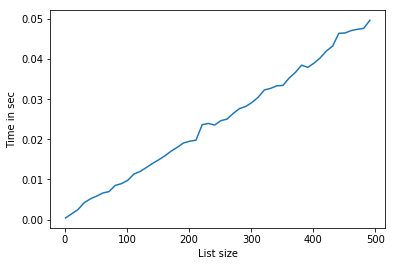

In [265]:
# print and plot timings
tests = [generate_random_float_list(i) for i in range(1, 500, 10)]
timings = get_timing(function=bucket_sort_positive_floats, parameters=tests, repeat=100)
plt.plot(list(timings[1].keys()), list(timings[1].values()))
plt.xlabel("List size")
plt.ylabel("Time in sec")
plt.show()